In [1]:
#%%
!pip install --upgrade pip
!pip install --upgrade ipython jupyter
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install scipy

Requirement already up-to-date: pip in /srv/conda/envs/notebook/lib/python3.7/site-packages (19.1.1)
Requirement already up-to-date: ipython in /srv/conda/envs/notebook/lib/python3.7/site-packages (7.5.0)
Requirement already up-to-date: jupyter in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.0)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

# Импортируем библиотеки hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
import sys # for recursion

def decrease_data():

    data = pd.read_csv('snsdata.csv', sep=',') # ';'
    # delete unused column
    data = data.drop(['gradyear', 'gender','friends'], axis=1)
    # print (data.index)
# Index
# 1 - 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming',  'cheerleading', 'baseball', 'tennis', 'sports', 
# 2 - 'cute', 'sex', 'sexy', 'hot', 'kissed',
# 3 - 'dance', 'band', 'marching', 'music', 'rock', 
# 4 - god', 'church', 'jesus', 'bible', 
# 5 - 'hair', 'dress', 'blonde',
# 6 -  'mall', 'shopping', 'clothes', 'hollister', 'abercrombie',
# 7 -  'die', 'death', 'drunk', 'drugs'
    #check

    #1
    describe_fild = ['basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming',  'cheerleading', 'baseball', 'tennis', 'sports']
    print("describe\n", data[describe_fild].describe())
    # summ by sport columns - присвоим среднее по всем спортивным полям
    for i in data.index:
        sum = []
        for name in describe_fild:
            sum.append(data.loc[i, name])
        data.loc[i, 'sport'] = np.mean(sum)
    # data.loc[:, 'sport'] = (data.loc[:, 'basketball'] > 5) # numpy.mean() # (data.loc[:, 'basketball'] > 5).astype(int)
    # delet not used other sports
    data = data.drop(describe_fild, axis=1)

    #2 approximate sentimental fild
    describe_fild = ['cute', 'sex', 'sexy', 'hot', 'kissed']
    print("describe\n", data[describe_fild].describe())
    for i in data.index:
        sum = []
        for name in describe_fild:
            sum.append(data.loc[i, name])
        data.loc[i, 'sentimental'] = np.mean(sum)
    data = data.drop(describe_fild, axis=1)
    

    #3 approximate music fild
    describe_fild = ['dance', 'band', 'marching', 'music', 'rock']
    print("describe\n", data[describe_fild].describe())
    for i in data.index:
        sum = []
        for name in describe_fild:
            sum.append(data.loc[i, name])
        data.loc[i, 'audio'] = np.mean(sum)
    data = data.drop(describe_fild, axis=1)
    
    #4 approximate religion fild
    describe_fild = ['god', 'church', 'jesus', 'bible']
    print("describe\n", data[describe_fild].describe())
    for i in data.index:
        sum = []
        for name in describe_fild:
            sum.append(data.loc[i, name])
        data.loc[i, 'religion'] = np.mean(sum)
    data = data.drop(describe_fild, axis=1)
    
    #5 approximate cute fild
    describe_fild = ['hair', 'dress', 'blonde']
    print("describe\n", data[describe_fild].describe())
    for i in data.index:
        sum = []
        for name in describe_fild:
            sum.append(data.loc[i, name])
        data.loc[i, 'cute'] = np.mean(sum)
    data = data.drop(describe_fild, axis=1)

    #6 approximate shop fild
    describe_fild = ['mall', 'shopping', 'clothes', 'hollister', 'abercrombie']
    print("describe\n", data[describe_fild].describe())
    for i in data.index:
        sum = []
        for name in describe_fild:
            sum.append(data.loc[i, name])
        data.loc[i, 'shop'] = np.mean(sum)
    data = data.drop(describe_fild, axis=1)

    #7 approximate bad boy fild - we need nikotine, suicide and more feel
    describe_fild = ['die', 'death', 'drunk', 'drugs']
    print("describe\n", data[describe_fild].describe())
    for i in data.index:
        sum = []
        for name in describe_fild:
            sum.append(data.loc[i, name])
        data.loc[i, 'bad_boy'] = np.mean(sum)
    data = data.drop(describe_fild, axis=1)
    
    print(data.head())

    print ('after normalized')
    describe_fild = ['sport', 'religion', 'cute', "bad_boy", 'shop', 'audio', 'sentimental', 'age']
    print(data[describe_fild].describe())


    seven_param = pd.DataFrame({
        "sport": data['sport'],
        "religion": data['religion'],
        "cute": data['cute'],
        "audio": data['audio'],
        "shop": data['shop'],
        "sentimental": data['sentimental'],
        "bad_boy": data['bad_boy'],
        "age": data['age']
    })
    seven_param.to_csv("snsdata_seven_param.csv", index=False)

    exit()

 # input dendro must be numpy
def hierarhy_clasterization(data):

    # varieties = np.array(data.pop('bad_boy_munged')) # religion
    varieties = (data)
    # print(varieties)
    # Извлекаем измерения как массив NumPy
    samples = np.array((data))
    
    sys.setrecursionlimit(10000) # attention it ibad!
    
    plt.figure()
    # Реализация иерархической кластеризации при помощи функции linkage
    mergings = linkage(samples, method='complete') # centroid
    print(mergings)
    # Строим дендрограмму, указав параметры удобные для отображения
    dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)
    
    plt.show()
    exit()

    #------
    #A very basic example:

    #  ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268., 400., 754., 564., 138., 219., 869., 669.])
    #  Z = hierarchy.linkage(ytdist, 'single')
    #  plt.figure()
    #  dn = hierarchy.dendrogram(Z)

    # # Now plot in given axes, improve the color scheme and use both vertical and horizontal orientations:
    

    #  hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
    #  fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    #  dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',
    # ...                            orientation='top')
    #  dn2 = hierarchy.dendrogram(Z, ax=axes[1],
    # ...                            above_threshold_color='#bcbddc',
    # ...                            orientation='right')
    #  hierarchy.set_link_color_palette(None)  # reset to default after use
    #  plt.show()



#nomy
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [11]:
get_ipython().run_line_magic('matplotlib', 'inline')
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,20)
# decrease_data()

data = pd.read_csv('snsdata_seven_param.csv', sep=',') # ';'
# ATTENTION - SELECT ONLY USED PARAM below ->
predictors = ['sport', 'religion', 'cute', "bad_boy", 'shop', 'audio', 'sentimental', 'age']    
#predictors = ['sport', 'religion', "bad_boy"]    
# delete unused column
# print (data.index)

data = data.reset_index()
data.dropna(inplace=True)
# delet invalid key NaN
for name_p in predictors:
    data[name_p + '_munged'] = data.apply(lambda r: data[r[name_p]].mean() if ( pd.isnull(r[name_p]) or pd.isna(r[name_p]) ) else r[name_p], axis=1)

predictors_munge = []
for name in predictors:
    predictors_munge.append(name + "_munged")
# print(data[predictors_munge].describe())

#delet_old columns
# data = data.drop(predictors)
data.drop(data.columns.difference(predictors_munge), 1, inplace=True)

# x = clean_dataset(data)
# data = data.reset_index()
data.dropna(inplace=True)
print (data.head())

# normalize data    
# x = data.iloc[:,:].values
scaler = StandardScaler()
scaler.fit(data[predictors_munge])
x_scaler = scaler.transform(data[predictors_munge])

# hierarhy_clasterization(x_scaler)      # <- check method

# print(x_scaler[1], data[0])

x = x_scaler                # = date
km = KMeans(n_clusters=11) # 3 .. 12
# clusters = km.fit_predict(x) # x.iloc[:, 2:5])    # the same clusters
# x = km.transform(x)                               # the same clusters
other_c = km.fit(x)    # x_scaler                   # the same clusters

#-------------------------------------------------
print("-"*35)
print("data separation:")
print("-"*35)
for i in range (km.n_clusters):
    print (km.labels_.tolist ().count(i))
# # draw results
# plt.figure (figsize=(15,15))
# for i in range (km.n_clusters):
#     plt.subplot (3,3,i + 1)
#     plt.hist (km.cluster_centers_[i], bins = 36)

# plt.show()

# write out who in what cluster 
data.loc[:,'cluster'] = km.labels_
print("-"*35)
print("claster content:")
print("-"*35)
for i, cluster in data.groupby('cluster'):
    print ("Cluster number %i" % i)
    print ("Men %i" % len(cluster.index))
    print (cluster.mean ())
    print ("Coordinate: ", km.cluster_centers_[i, :]) # для i кластера все его координаты
    print ("="*35)
#-------------------------------------------------


   sport_munged  religion_munged  cute_munged  bad_boy_munged  shop_munged  \
0           0.0             0.00     0.000000            0.00          0.0   
1           0.1             0.25     3.333333            0.00          0.2   
2           0.1             0.00     0.000000            0.25          0.0   
3           0.0             0.00     0.000000            0.00          0.0   
4           0.0             0.25     0.333333            0.50          0.4   

   audio_munged  sentimental_munged  age_munged  
0           0.2                 0.0      18.982  
1           0.8                 0.2      18.801  
2           0.6                 0.0      18.335  
3           0.2                 0.2      18.875  
4           1.0                 1.2      18.995  
-----------------------------------
data separation:
-----------------------------------
2148
14745
1626
1487
1
206
291
102
1950
1592
766
-----------------------------------
claster content:
-----------------------------------
Clus

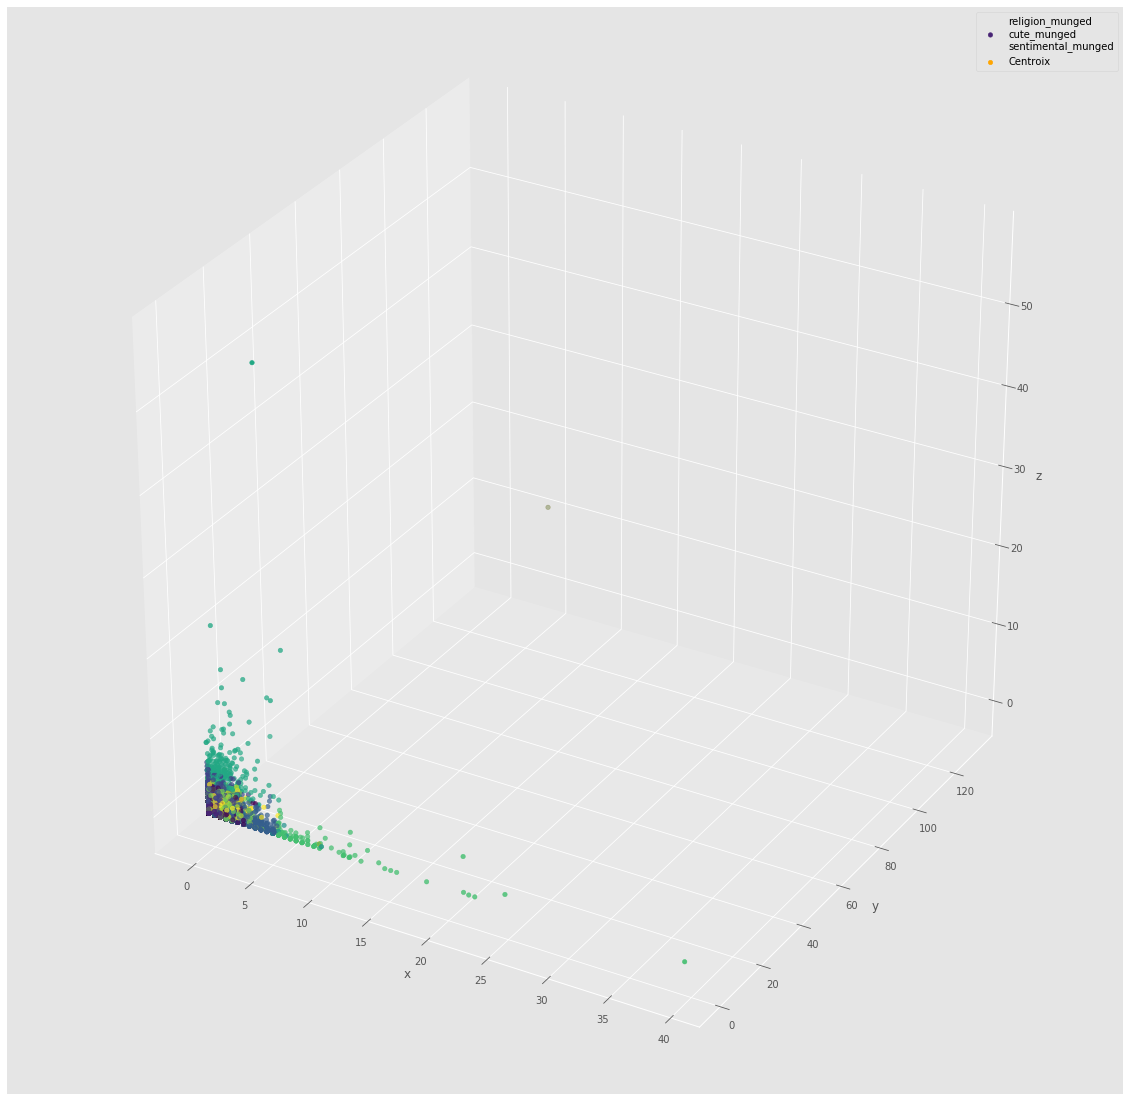

In [12]:

# select parameters for clasterization
# 3 fig - 3: bad shop audio; 4: cute bad shop
# last 7 fig - have a good 7: audio sent age - они не пересекаются,  интересно
# большинство всегда в одном кластере
# при 4 и более кластеразх 1 - всегда в отдельном кластере! (associated with ''cute'')
# show all ->
# diapazon = len(predictors_munge)
# for i in range(diapazon - 2):
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     # x\[predictors_munge\[(\d)\]\] - regular
#     ax.scatter(x[predictors_munge[i]], x[predictors_munge[i+1]], x[predictors_munge[i+2]], c=other_c.labels_.astype(float), label=predictors_munge[i]+"\n"+predictors_munge[i+1]+"\n"+predictors_munge[i+2]) # c=other_c.labels_.astype(float)
#     ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], s=20, c="orange", label="Centroix")

#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
#     ax.set_zlabel('z')

#     plt.legend()
#     plt.show()

###1 - religion cute sent
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i, j, k = 1, 2, 6
# x\[predictors_munge\[(\d)\]\] - regular
ax.scatter(x[: , i], x[: , j], x[: , k], c=other_c.labels_.astype(float), label=predictors_munge[i]+"\n"+predictors_munge[j]+"\n"+predictors_munge[k]) # c=other_c.labels_.astype(float)
ax.scatter(km.cluster_centers_[:, i], km.cluster_centers_[:, j], km.cluster_centers_[:, k], s=20, c="orange", label="Centroix")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel('z')

plt.legend()
plt.show()



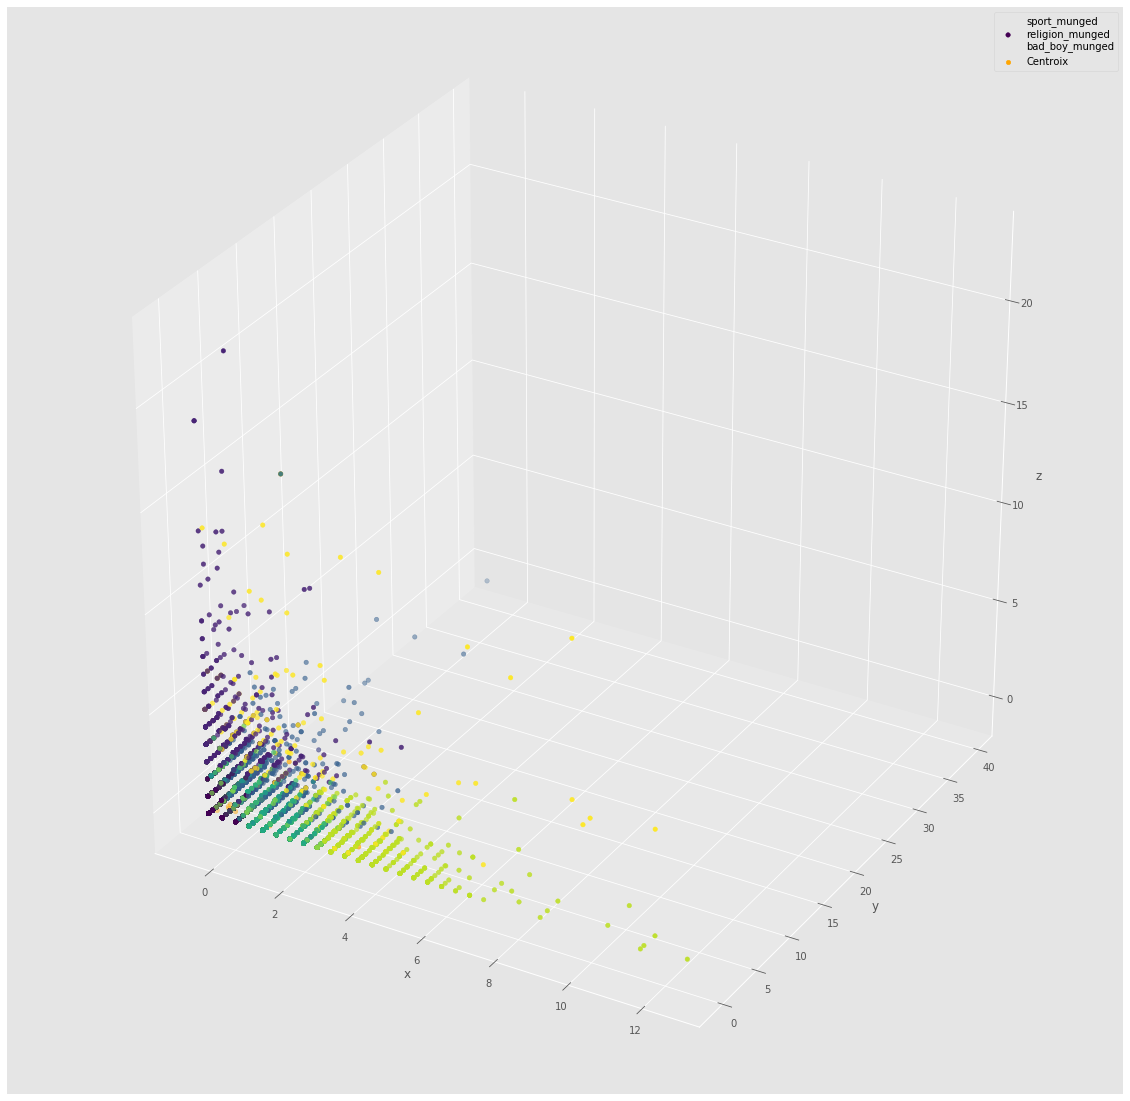

In [9]:
###2  - religion bad sport
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i, j, k = 0, 1, 3
# x\[predictors_munge\[(\d)\]\] - regular
ax.scatter(x[: , i], x[: , j], x[: , k], c=other_c.labels_.astype(float), label=predictors_munge[i]+"\n"+predictors_munge[j]+"\n"+predictors_munge[k]) # c=other_c.labels_.astype(float)
ax.scatter(km.cluster_centers_[:, i], km.cluster_centers_[:, j], km.cluster_centers_[:, k], s=20, c="orange", label="Centroix")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel('z')

plt.legend()
plt.show()



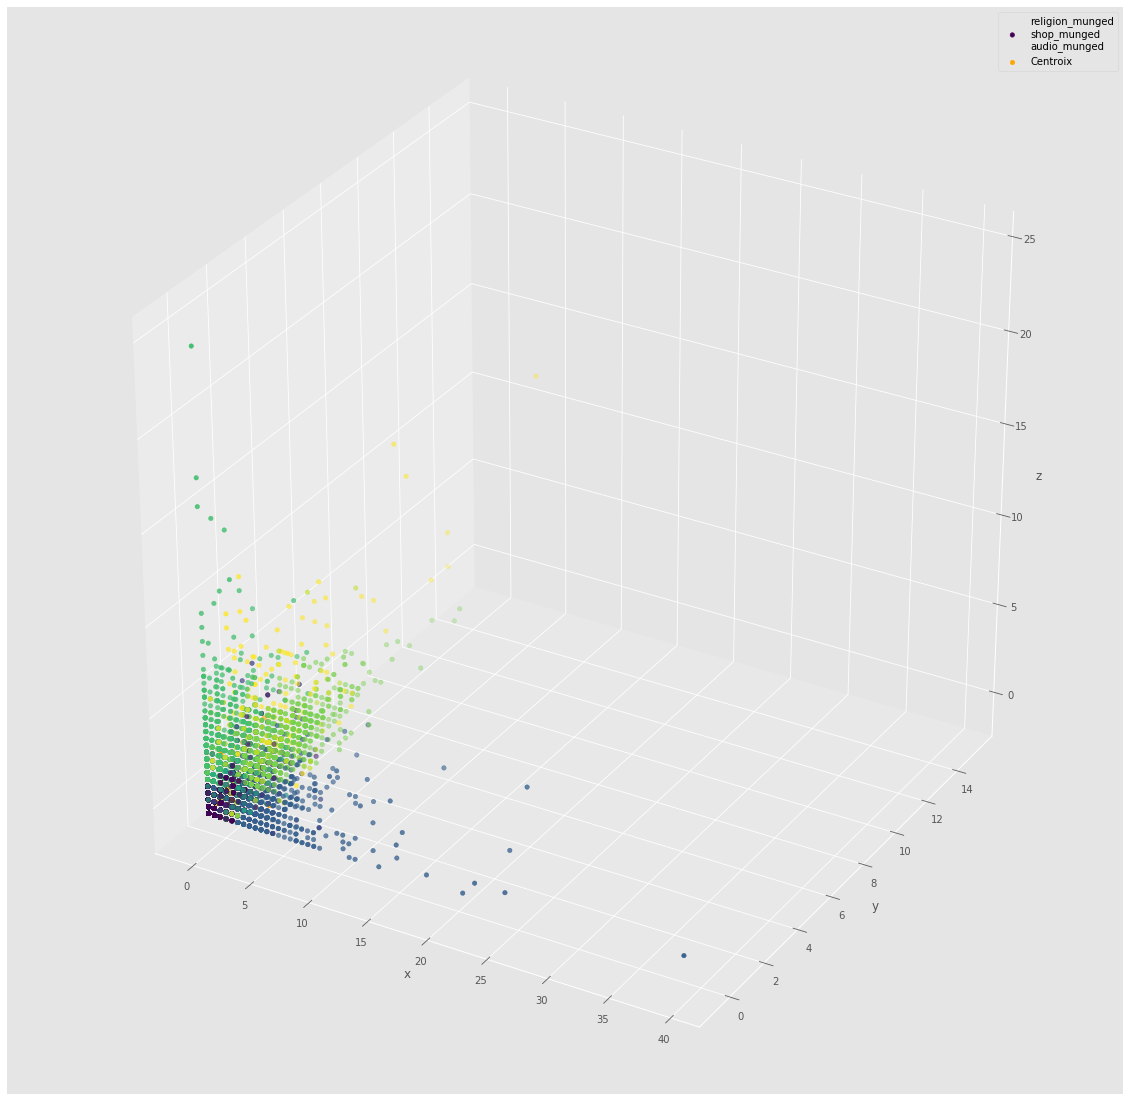

In [10]:
###3  - religion, shop, music
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i, j, k = 1, 4, 5
name_i, name_j, name_k = 'religion', 'shop', 'music'
# x\[predictors_munge\[(\d)\]\] - regular
ax.scatter(x[: , i], x[: , j], x[: , k], c=other_c.labels_.astype(float), label=predictors_munge[i]+"\n"+predictors_munge[j]+"\n"+predictors_munge[k]) # c=other_c.labels_.astype(float)
ax.scatter(km.cluster_centers_[:, i], km.cluster_centers_[:, j], km.cluster_centers_[:, k], s=20, c="orange", label="Centroix")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel('z')

plt.legend()
plt.show()